In [814]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
from collections import Counter

In [815]:
def cor_round(x):
    return(int(x + (0.5 if x > 0 else -0.5)))

def func_lyambda(x, y):
    mod_x = math.fabs(x)
    mod_y = math.fabs(y)
    return(cor_round(mod_x) * (mod_y - math.floor(mod_y)))

In [816]:
def my_distr_func(x):
    summa = 0
    n = math.floor(x) + 1
    while (n != 10000):
        summa = summa + math.e ** (-n - x / n)
        n = n + 1
    f = 1 - math.e ** (-1/2 - math.floor(x)) + math.e ** (1/2 - math.floor(x)) / (math.e - 1) - math.e ** (1/2) * summa
    return(f)

C:\Users\ROG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


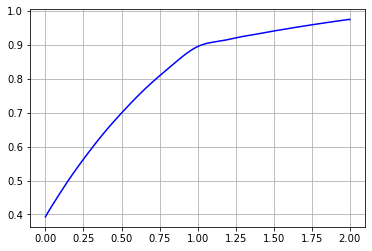

In [817]:
a = 0
b = 2
count_points = 10000
x = np.linspace(a, b, count_points)
y = [my_distr_func(x[i]) for i in range(count_points)]
t = np.polyfit(x, y, 150)
f = np.poly1d(t)
plt.grid() # рисуем сетку
#print(f)
x1 = np.linspace(a, b, count_points)
plt.plot(x1, f(x1), 'b')
#plt.plot(x, y, 'o')

In [818]:
class deterministic_gen(stats.rv_continuous):
    def _cdf(self, x):
        return np.where(x < 0, (math.e ** x) / 2, 1 - (math.e ** (-x)) / 2)

In [819]:
deterministic = deterministic_gen(name="deterministic")
left = -100.5
right = 100.5
delta = 0.0001
count_takes = int((right - left) / delta)

list_x = np.linspace(left, right, count_takes + 1)
list_F_x = deterministic.cdf(list_x)
list_y = np.linspace(left, right, count_takes + 1)
list_F_y = deterministic.cdf(list_y)
#print(list_x)
list_P_x_discr = []
list_P_y_discr = []
for i in range(count_takes):
    list_P_x_discr.append(list_F_x[i + 1] - list_F_x[i])
    list_P_y_discr.append(list_F_y[i + 1] - list_F_y[i])
    
list_x = list_x[1:]
list_y = list_y[1:]
#sum(list_P_discr)

In [820]:
count_model = 1000000
yi_takes = np.random.choice(list_y, count_model, p = list_P_y_discr)
xi_takes = np.random.choice(list_x, count_model, p = list_P_x_discr)
#xi_takes

In [821]:
func_x = [func_lyambda(xi_takes[i], yi_takes[i]) for i in range(count_model)]
#func_x

In [822]:
dict_func_x = Counter(func_x)
#dict_func_x

In [823]:
sort_dict_func_x = {}
for i in sorted(dict_func_x.keys()):
    sort_dict_func_x[i] = dict_func_x[i]
#sort_func_x

In [824]:
sort_dict_func_P_x = {}
for i in sort_dict_func_x.keys():
    sort_dict_func_P_x[i] = sort_dict_func_x[i] / count_model
#sort_dict_func_P_x

In [825]:
new_sort_dict_func_P_x = {}
j = 0
for i in sort_dict_func_x.keys():
    new_sort_dict_func_P_x[j] = (i, sort_dict_func_P_x[i])
    j = j + 1
#new_sort_dict_func_P_x

In [826]:
for i in range(1, len(new_sort_dict_func_P_x.keys())):
    new_sort_dict_func_P_x[i] = (new_sort_dict_func_P_x[i][0], new_sort_dict_func_P_x[i][1] + new_sort_dict_func_P_x[i - 1][1])
#new_sort_dict_func_P_x

In [827]:
model_distr_func = {}
for i in range(len(new_sort_dict_func_P_x.keys())):
    model_distr_func[new_sort_dict_func_P_x[i][0]] = new_sort_dict_func_P_x[i][1]
#model_distr_func

In [828]:
len(model_distr_func)

56380

In [829]:
len(model_distr_func)

56380

C:\Users\ROG\anaconda3\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\ROG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


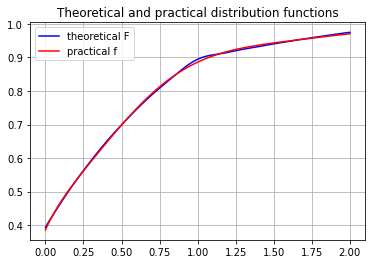

In [830]:
x_model = list(model_distr_func.keys())
y_model = list(model_distr_func.values())
t_model = np.polyfit(x_model, y_model, 150)
f_model = np.poly1d(t_model)
fig, ax = plt.subplots()
ax.set_title('Theoretical and practical distribution functions')
plt.grid() # рисуем сетку

#print(f)
x1 = np.linspace(a, b, count_points)
plt.plot(x1, f(x1), 'b', label = 'theoretical F')
plt.plot(x1, f_model(x1), 'r', label = 'practical f')
plt.legend(loc=0)
plt.show()
#plt.plot(x, y, 'o')

In [831]:
a = 0
b = 2
count_points = 10000
y = []
x = np.linspace(a, b, count_points)

In [832]:
for cur_x in x:
    y.append(1 - f(cur_x) / f_model(cur_x))

In [833]:
Absolute_Error = np.linalg.norm(y)
Absolute_Error

0.43627186034360294

In [834]:
odin = [1 for i in range(count_points)]

In [835]:
Relative_Error = Absolute_Error / np.linalg.norm(odin)
print('Relative Error: ' + str(Relative_Error))

Relative Error: 0.004362718603436029


In [800]:
f(1)

0.8938431020430929

In [801]:
f_model(1)

0.8942788454204718

In [797]:
1-math.e ** (-1/2)

0.3934693402873666